In [11]:
using Gadfly

###  最速下降法

In [67]:
norm(x) = sqrt(x'*x)
function steepest_descent(f, g, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 
    
   
    xk = x0
    l = [xk]
    fk = f(xk...)
    for i in 1:maxIterations
        # iteration
        d =-g(xk...)
        α = search_for_alpha(f, xk, fk, d, -d)
        δ = α*d
        xn = xk .+ δ
        push!(l,xn)
        fn = f(xn...)
        # convegence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return l
        end
        if debug
            println("i=",i, " α=", α, " xk=", xk, " d=", d, " δ= ",δ)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
end

steepest_descent (generic function with 1 method)

In [68]:
function search_for_alpha(f, xk, fk, d, g; α0=100, ϵ=0.5, τ=0.5)
    α = α0
    ϕ0= d'*g
    while f((xk .+ α*d)...) > fk + ϵ*α*ϕ0
        α = τ*α
    end
    return α 
end

search_for_alpha (generic function with 1 method)

In [69]:
l1 = steepest_descent(
    (x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2,
    (x1,x2)->[2x1+3x2-1; 9x2+3x1-5],
    [1., 3.],
    maxIterations = 10000,
    debug=false
)

Convergence is reached after 13 iterations.


14-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [0.0234375, 0.558594]
 [-0.117706, 0.53952] 
 [-0.19254, 0.636676] 
 [-0.295069, 0.606898]
 [-0.340099, 0.689539]
 [-0.378031, 0.671419]
 [-0.579745, 0.742766]
 [-0.606624, 0.763992]
 [-0.614312, 0.758518]
 [-0.650975, 0.771234]
 [-0.655566, 0.775851]
 [-0.657169, 0.774292]
 [-0.66384, 0.776541] 

In [70]:
fit = layer((x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2, -3, 3, -3, 3)

1-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-3],:xmax=>[3],:ymin=>[-3],:ymax=>[3],:z=>##160#161()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

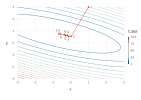

In [71]:
pic1=
layer(x=[l1[i][1] for i in 1:length(l1)],
      y=[l1[i][2] for i in 1:length(l1)],
      label=[string(i) for i in 1:length(l1)],
      #coord = Coord.cartesian(xmin=-1, xmax=1, ymin=0, ymax=1)
      Geom.point,Geom.line,Geom.label,#Geom.vector
    Theme(default_color = "red")
)
plot(pic1,fit)

###  牛顿法

In [72]:
function Newton(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 
    
    xk = x0
    l = [xk]
    fk = f(xk...)
    for i in 1:maxIterations
        # iteration
        d =-inv(h(xk...))*g(xk...)
        α = 1
        δ = α*d
        xn = xk .+ δ
        push!(l,xn)
        fn = f(xn...)
        # convegence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return l
        end
        if debug
            println("i=",i, " α=", α, " xk=", xk, " xn=", xn, " d=", d, " δ= ",δ)
            println("fk=", fk, "\tfn=", fn)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
end

Newton (generic function with 1 method)

In [73]:
l2 = Newton(
    (x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2,
    (x1,x2)->[2x1+3x2-1; 9x2+3x1-5],
    (x,y)->[2 3;
            3 9],
    [1.,3.],
    maxIterations = 10000000,
    debug=true
)

i=1 α=1 xk=[1.0, 3.0] xn=[-0.666667, 0.777778] d=[-1.66667, -2.22222] δ= [-1.66667, -2.22222]
fk=34.5	fn=-1.6111111111111112
Convergence is reached after 2 iterations.


3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [-0.666667, 0.777778]
 [-0.666667, 0.777778]

In [74]:
fit = layer((x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2, -3, 3, -3, 3)

1-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-3],:xmax=>[3],:ymin=>[-3],:ymax=>[3],:z=>##173#174()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

In [75]:
l2

3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [-0.666667, 0.777778]
 [-0.666667, 0.777778]

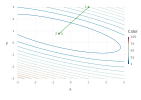

In [130]:
pic2=
layer(x=[l2[i][1] for i in 1:length(l2)],
      y=[l2[i][2] for i in 1:length(l2)],
      label=[string(i) for i in 1:length(l2)],
      #coord = Coord.cartesian(xmin=-1, xmax=1, ymin=0, ymax=1)
      Geom.point,Geom.line,Geom.label,#Geom.vector
      Theme(default_color = "green")
)
plot(pic2,fit)

###  共轭梯度法

In [5]:
function GE_ge(f,fd,hessian,X0; 
                      accuracy::Float64 = 0.00001,
                      verbose::Bool = false)
    if ndims(hessian) != 2
        return false           #判断黑塞矩阵
    end
    nr, nc = size(hessian)
    if nr != nc 
        return false
    end    
    h = hessian  
    x0 = X0
    l = [x0]
    if x0 == 0
        x0 = zeros(nc)
    elseif length(x0) != nc
        return false 
    end
    r0 = -fd(x0...)                
    rs0= sum(r0'*r0)
    d0 = r0                    
    for i = 1:nc
        a = sum(r0'*r0/(d0'*h*d0)) 
        x = x0 .+ a*d0
        push!(l,x)
        if i==1
            g1=fd(x...)
            println(0,"  g0=",-r0,"  d0=",d0,"  a0=",a,"  x1=",x,"  g1=",g1)
        end
        r = r0 .- a*h*d0         
        rs=sum(r'*r )
        if rs < accuracy
            return l
        end
        b = rs/rs0                  
        d = r + b*d0               
        ai = sum(r'*d/(d'*h*d))   
        xi = x+ai*d                
        gi = fd(xi...)          
        if verbose 
            println(i,"  b",i-1,"=",b,"  d",i,"=", d,"  a",i,"=",ai,"  x",i+1,"=",xi,"  g",i+1,"=",gi)
        end
        x0 = x
        r0 = r
        rs0= rs
        d0 = d
    end
    println(nc, " iterations have been calculated.")
    println("Final step rs = ", rs0)
    return x0, f(x0...)
end

GE_ge (generic function with 1 method)

In [6]:
l3 = GE_ge((x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2,
             (x1,x2)->[2x1+3x2-1; 9x2+3x1-5],
              [2 3;
               3 9],
              [1.,3.],
              verbose=true)

0  g0=[10.0, 25.0]  d0=[-10.0, -25.0]  a0=0.09897610921501707  x1=[0.0102389, 0.525597]  g1=[0.59727, -0.238908]
1  b0=0.0005707696071008404  d1=[-0.602977, 0.224639]  a1=1.1226053639846743  x2=[-0.666667, 0.777778]  g2=[4.21885e-15, 1.15463e-14]


3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]           
 [0.0102389, 0.525597]
 [-0.666667, 0.777778]

In [92]:
fit = layer((x1,x2)->x1^2+4.5x2^2+3x1*x2-x1-5x2, -3, 3, -3, 3)

1-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-3],:xmax=>[3],:ymin=>[-3],:ymax=>[3],:z=>##213#214()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

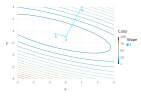

In [125]:
pic3=
layer(x=[l3[i][1] for i in 1:length(l3)],
      y=[l3[i][2] for i in 1:length(l3)],
      label=[string(i) for i in 1:length(l3)],
      #coord = Coord.cartesian(xmin=-1, xmax=1, ymin=0, ymax=1)
      Geom.point,Geom.line,Geom.label,#Geom.vector
      shape=[Shape.square]
)
plot(pic3,fit)

### 画在一张图中

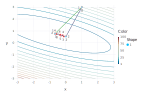

In [131]:
plot(pic3,pic1,pic2,fit)